# this notebook uses statistical tests for categorical and numerical columns to see if there are relations between the features and target variable. 
- used CramersV, chi2, Anova, Pearson and mutual Information Tests to 

In [30]:
# import 
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('../../library')
print(os.path.isfile('../../library/gc_storage.py'))
import gc_storage
from joblib import load,dump

from google.cloud import storage

from scipy.stats import chi2_contingency


True


In [3]:
# init Google Cloud storage
bucket_name='sep25-bds-road-accidents'
key_path='../../auth/fiery-glass-478009-t8-18a81c8cbe63.json'

bucket = gc_storage.init_bucket( bucket=bucket_name,
                                 json_key_path=key_path )

Initialized sep25-bds-road-accidents


In [84]:
# listing joblibs
gc_storage.list_bucket( bucket=bucket,
                        remote_folder='2_preprocessing' )

data/processed/2_preprocessing/0.1-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/0.2-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/0.3-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/0.4-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/1.0-becker-data-preprocessing_usagers.joblib
data/processed/2_preprocessing/1.0-leibold-data-preprocessing_vehicles.joblib
data/processed/2_preprocessing/1.0-simmler-data-preprocessing_accidents.joblib
data/processed/2_preprocessing/1.0.1-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/1.0.2-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/1.0.3-munz-data-preprocessing_locations.joblib
data/processed/2_preprocessing/1.1-becker-data-preprocessing_usagers.joblib
data/processed/2_preprocessing/1.1-leibold-data-preprocessing_concat.joblib
data/processed/2_preprocessing/1.1-leibold-data-preprocessing_vehicles.joblib

In [ ]:
# download from google cloud
df = gc_storage.download( bucket=bucket,
                                  remote_path='2_preprocessing/1.2-leibold-data-preprocessing_concat.joblib')

Downloaded data/processed/2_preprocessing/1.2-leibold-data-preprocessing_concat.joblib to
 ../../data/processed/2_preprocessing/1.2-leibold-data-preprocessing_concat.joblib


In [90]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534545 entries, 0 to 1534544
Data columns (total 56 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   acc_num                 1534545 non-null  int64         
 1   ind_vehID               1534545 non-null  object        
 2   veh_num                 1534545 non-null  object        
 3   ind_place               1534545 non-null  int64         
 4   ind_cat                 1534545 non-null  int64         
 5   ind_severity            1534545 non-null  int64         
 6   ind_sex                 1534545 non-null  int64         
 7   ind_trip                1534545 non-null  int64         
 8   ind_secu1               1532650 non-null  Int64         
 9   ind_secu2               958245 non-null   Int64         
 10  ind_location            776129 non-null   Int64         
 11  ind_action              841685 non-null   Int64         
 12  ind_year      

In [91]:
numeric_col = [
    'veh_num', 'ind_year', 'acc_year', 'acc_month', 'acc_date',
    'acc_lat', 'acc_long', 'loca_ref_point', 'loca_ref_point_dist',
    'loca_road_width', 'loca_max_speed'
]

categorical_col = [
    'acc_num', 'ind_vehID', 'ind_place', 'ind_severity', 'ind_accident',
    'ind_trip', 'ind_location', 'ind_age_group', 'acc_department',
    'acc_municipality', 'acc_metro', 'acc_ambient_lighting',
    'acc_atmosphere', 'acc_urbanization_level', 'acc_intersection',
    'acc_collision_type', 'veh_traffic_direction', 'veh_cat',
    'veh_fixed_obstacle', 'veh_moving_obstacle', 'veh_impact',
    'veh_maneuver', 'veh_motor', 'veh_id', 'loca_road_cat',
    'loca_road_id1', 'loca_road_id2', 'loca_traffic_cond',
    'loca_reserved_lane', 'loca_road_gradient', 'loca_road_view',
    'loca_land_strip', 'loca_road_surface_cond', 'loca_infrastructure',
    'loca_accident', 'loca_road_no', 'loca_road'
]


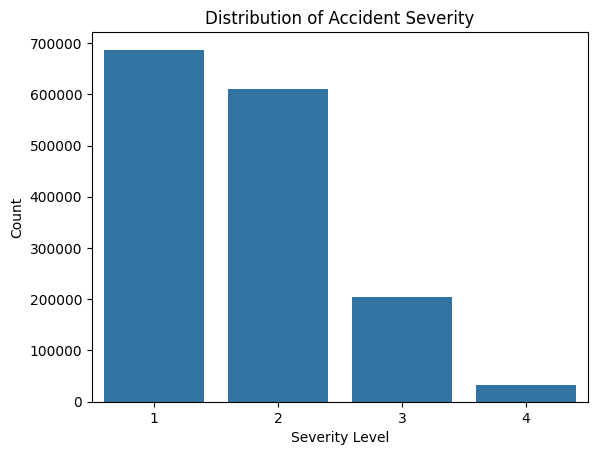

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='ind_severity', order=df['ind_severity'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

In [93]:
# describtion of numerical columns
df[numeric_col].describe().round(2).transpose()

,count,mean,min,25%,50%,75%,max,std
ind_year,1534545.0,2021.68,2019.0,2020.0,2022.0,2023.0,2024.0,1.74
acc_year,1534545.0,2021.68,2019.0,2020.0,2022.0,2023.0,2024.0,1.74
acc_month,1534545.0,6.72,1.0,4.0,7.0,10.0,12.0,3.35
acc_date,1534545,2022-03-11 19:32:42.896102912,2019-01-01 00:00:00,2020-09-04 00:00:00,2022-05-03 00:00:00,2023-09-27 00:00:00,2024-12-31 00:00:00,NaN
acc_lat,1534545.0,44.34,-61.43,44.69,47.82,48.86,63.57,12.16
acc_long,1534545.0,2.2,-178.16,1.36,2.4,4.81,174.02,19.02
loca_ref_point,1534545.0,19.32,0.0,0.0,1.0,14.0,9412.0,73.08
loca_ref_point_dist,1534545.0,194.63,0.0,0.0,1.0,373.0,9932.0,303.76
loca_road_width,1281219.0,2.07,0.0,1.0,1.0,1.0,105.0,2.77
loca_max_speed,1489296.0,62.83,0.0,50.0,50.0,80.0,180.0,24.24



 Interpretation: 
- acc_year and ind_year is redundant. 
- latitude from -61,43 to 63,57
- longitude from -178,16 to 174,02
- max speed from 0 to 180 , mean is 63
- loca road width has outliers. max is 9932 and mean 2,07.
- 


In [94]:
print(df['acc_collision_type'].nunique())
print(df['ind_severity'].nunique())
print(df[['acc_collision_type', 'ind_severity']].dropna().shape)
r, k = crosstable.shape
print(f"r = {r}, k = {k}, min(k-1, r-1) = {min(k-1, r-1)}")
print(df['acc_collision_type'].value_counts(dropna=False))



7
4
(1525856, 2)
r = 8, k = 4, min(k-1, r-1) = 3
acc_collision_type
3.0    542899
2.0    221319
6.0    212960
1.0    181347
4.0    173442
5.0    143090
7.0     50799
NaN      8689
Name: count, dtype: int64


In [95]:


# create crosstable 
crosstable = pd.crosstab(df['acc_collision_type'],df['ind_severity'])

# chi2 test
chi2,p,dof,expected = chi2_contingency(crosstable)
# compute Cramers V
n= crosstable.sum().sum()
phi2= chi2/n
r, k = crosstable.shape
cramers_v = np.sqrt(phi2/min(k-1,r-1))
print(f" Cramer's V for acc_collision_type vs. ind_severity: {cramers_v:.3f}")

# weak association between acc_collision_type and ind_severity

 Cramer's V for acc_collision_type vs. ind_severity: 0.141


loca_land_strip: Cramer's V = 0.182
acc_urbanization_level: Cramer's V = 0.145
acc_collision_type: Cramer's V = 0.141
ind_location: Cramer's V = 0.138
ind_place: Cramer's V = 0.117
veh_fixed_obstacle: Cramer's V = 0.11
ind_trip: Cramer's V = 0.105
loca_road_cat: Cramer's V = 0.103
veh_moving_obstacle: Cramer's V = 0.098
loca_accident: Cramer's V = 0.098
ind_age_group: Cramer's V = 0.093
veh_maneuver: Cramer's V = 0.086
veh_cat: Cramer's V = 0.074
veh_impact: Cramer's V = 0.067
loca_road_view: Cramer's V = 0.06
acc_intersection: Cramer's V = 0.039
loca_road_gradient: Cramer's V = 0.035
acc_atmosphere: Cramer's V = 0.031
loca_reserved_lane: Cramer's V = 0.03
veh_motor: Cramer's V = 0.024
acc_metro: Cramer's V = 0.023
loca_road_surface_cond: Cramer's V = 0.021
veh_traffic_direction: Cramer's V = 0.017


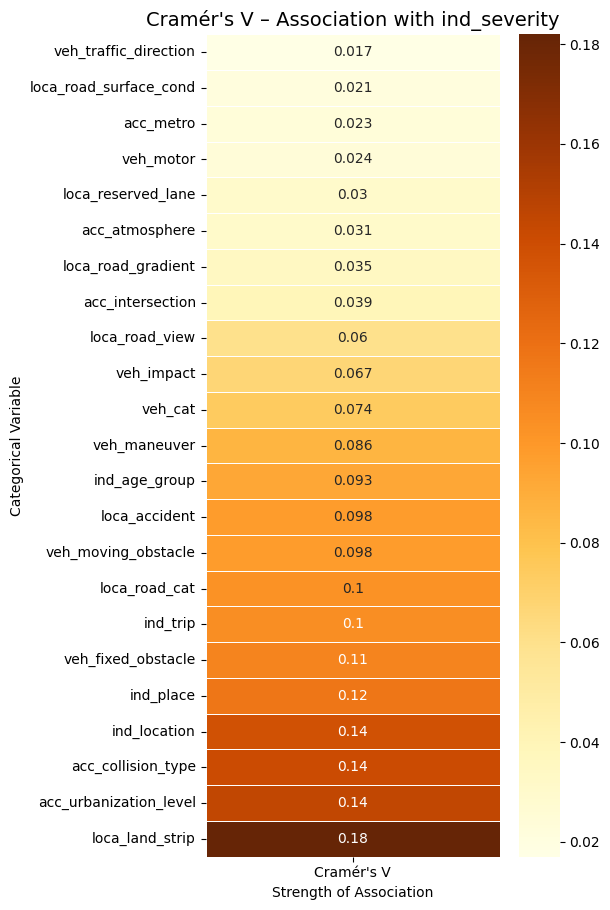

In [96]:
# create cramers_V results for all categorical variables
target='ind_severity'
# create a dictionary for results
cramers_v_scores={}

# loop through all categorical variables
for col in categorical_col_filtered: 
    try:
        subset=df[[col,target]].dropna()
        crosstable=pd.crosstab(subset[col],subset[target])
        r,k=crosstable.shape
        if min(k-1,r-1)>0:          # check if variance 
            chi2, _, _, _ = chi2_contingency(crosstable) 
            n=crosstable.sum().sum()
            phi2=chi2/n
            v=np.sqrt(phi2/min(k-1,r-1))
            cramers_v_scores[col]=round(v,3)
        else:
            cramers_v_scores[col]=None
    except: 
        cramers_v_scores[col]=None

sorted_scores=dict(sorted(cramers_v_scores.items(),key=lambda item:item[1]if item[1] is not None else -1, reverse=True))
for var, score in sorted_scores.items():
    print(f"{var}: Cramer's V = {score}")


# Convert to DataFrame for plotting
cramers_df = pd.DataFrame.from_dict(cramers_v_scores, orient='index', columns=["Cramér's V"])
cramers_df = cramers_df.dropna().sort_values("Cramér's V", ascending=True)
cramers_df = cramers_df.drop(index=['veh_id', 'acc_num'], errors='ignore')


# Plot heatmap
plt.figure(figsize=(6, len(cramers_df) * 0.4))
sns.heatmap(cramers_df, annot=True, cmap='YlOrBr', linewidths=0.5, cbar=True)
plt.title("Cramér's V – Association with ind_severity", fontsize=14)
plt.xlabel("Strength of Association")
plt.ylabel("Categorical Variable")
plt.tight_layout()
plt.show()

# Interpretation of Cramér's V analysis:

 - acc_municipality, loca_road, loca_land_strip, and acc_department show the strongest statistical association with the target variable 'ind_severity' but they have high cardinality (acc_municipality for example). so the model misinterpret their importance 
 - veh_cat, veh_maneuver, ind_age_group, and acc_intersection show weak association.
 - acc_metro, veh_motor, loca_road_surface_cond, and loca_infrastructure show no or very weak association.

Important notes:
 - Cramér's V measures statistical association, not causality.
 - It only captures linear relationships between categorical variables.
 - Variables with high cardinality (many unique values) can produce inflated or misleading Cramér's V scores.


Mutual Information scores:
ind_location              0.042856
acc_collision_type        0.029534
ind_place                 0.024636
ind_trip                  0.016497
loca_road_cat             0.016141
veh_fixed_obstacle        0.014041
veh_moving_obstacle       0.012976
ind_age_group             0.012404
loca_accident             0.010968
veh_maneuver              0.010959
acc_urbanization_level    0.010412
veh_impact                0.007433
veh_cat                   0.007015
loca_road_view            0.004985
acc_intersection          0.002429
loca_road_gradient        0.001767
loca_reserved_lane        0.001516
acc_atmosphere            0.001389
veh_motor                 0.001094
loca_road_surface_cond    0.000662
veh_traffic_direction     0.000402
acc_metro                 0.000252
loca_land_strip           0.000137
dtype: float64


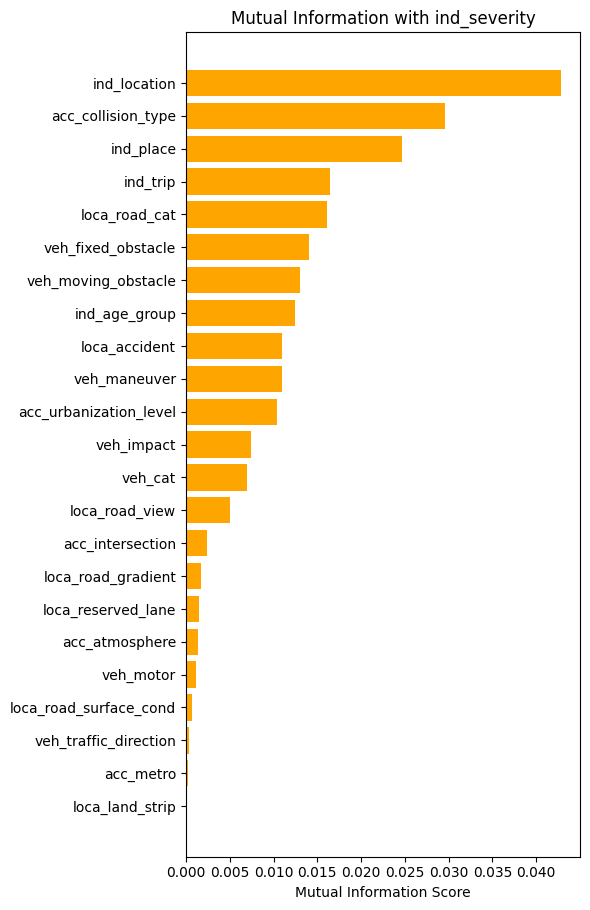

In [98]:
# Step 1: Import necessary functions

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
# Step 2: Define target column (already did that in Cramers V)
# Define list of categorical columns, excluding ID-like variables
excluded_cols = ['ind_vehID', 'acc_num', 'veh_id','acc_municipality','acc_department','ind_severity','loca_road','loca_road_no']
categorical_col_filtered = [col for col in categorical_col if col not in excluded_cols and col in df.columns]

# Step 3: Encode all categorical variables and store in new DataFrame
encoded_df = pd.DataFrame()

# Loop through each categorical column
# Step 3: Encode all categorical variables and store in new DataFrame
encoded_df = pd.DataFrame()

# Loop through each categorical column
for col in categorical_col_filtered:
    if col in df.columns:  # check if column exists
        try:
            le = LabelEncoder()
            encoded_df[col] = le.fit_transform(df[col].astype(str))
        except:
            pass  # skip if encoding fails

# Step 4: Encode target variable
le_target = LabelEncoder()
y = le_target.fit_transform(df[target].astype(str))

# Step 5: Compute mutual information scores
mi_scores = mutual_info_classif(encoded_df, y, discrete_features=True)

# Step 6: Create result table
mi_result = pd.Series(mi_scores, index=encoded_df.columns).sort_values(ascending=False)

# Step 7: Print results
print("Mutual Information scores:")
print(mi_result)

# Step 8: Plot the results

mi_result_sorted = mi_result.sort_values(ascending=True)  # sort for horizontal barplot


plt.figure(figsize=(6, len(mi_result_sorted) * 0.4))  # adjust height to number of variables
plt.barh(mi_result_sorted.index, mi_result_sorted.values, color='orange')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information with ind_severity')
plt.tight_layout()
plt.show()

# Interpretation of Mutual Information analysis:



- loca_road shows the highest MI score (0.10), indicating strong predictive value for ind_severity
- ind_location, acc_collision_type, ind_place, and loca_road_no show moderate MI (0.02–0.05), useful in combination
ind_trip, loca_road_cat, veh_fixed_obstacle, veh_moving_obstacle, and ind_age_group show low but non-negligible MI (~0.01–0.02)
- veh_cat, veh_impact, acc_intersection, and others below 0.01 contribute minimal information and may be excluded
- acc_municipality was excluded due to high cardinality and geographic encoding, which can distort MI
- MI captures both linear and nonlinear associations and complements Cramér’s V for feature selection
- MI values are not normalized; interpretation is based on relative ranking, not absolute thresholds



                        CramersV  mutual_information  Cardinality
ind_location               0.138            0.042856           10
acc_collision_type         0.141            0.029534            7
ind_place                  0.117            0.024636           11
ind_trip                   0.105            0.016497            8
loca_road_cat              0.103            0.016141            8
veh_fixed_obstacle         0.110            0.014041           18
veh_moving_obstacle        0.098            0.012976            7
ind_age_group              0.093            0.012404            5
loca_accident              0.098            0.010968            8
veh_maneuver               0.086            0.010959           26
acc_urbanization_level     0.145            0.010412            2
veh_impact                 0.067            0.007433           10
veh_cat                    0.074            0.007015           31
loca_road_view             0.060            0.004985            4
acc_inters

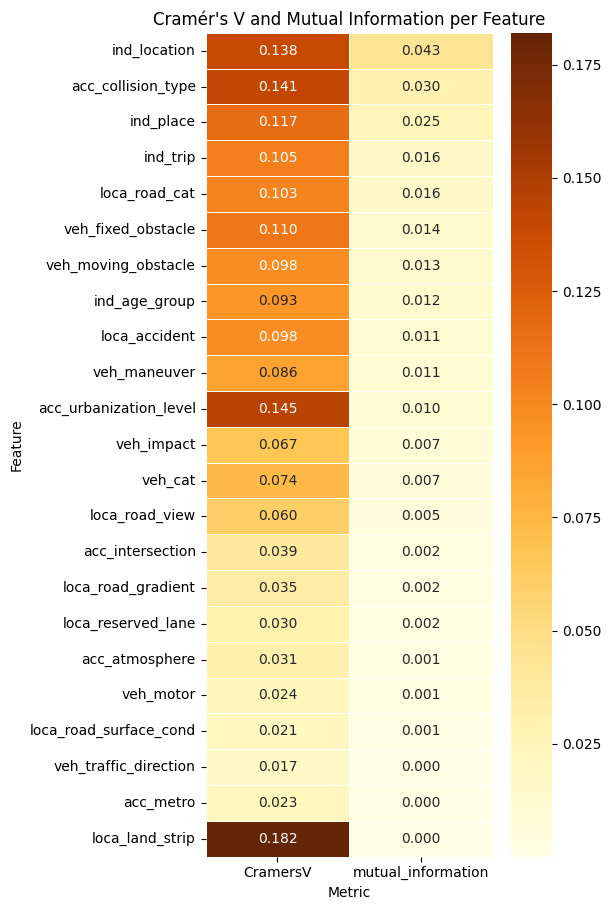

In [100]:
# combine CramersV and MI analysis
# convert mi_results to dataframe
mi_df = mi_result.to_frame(name='mutual_information')
combined_df = cramers_df.join(mi_df, how='inner')
combined_df.columns=['CramersV','mutual_information']
combined_df['Cardinality'] = [df[col].nunique() for col in combined_df.index]
combined_df = combined_df.sort_values(by='mutual_information', ascending=False)
print(combined_df)


# plot
plt.figure(figsize=(6, len(combined_df) * 0.4))  # dynamische Höhe
sns.heatmap(combined_df[['CramersV', 'mutual_information']], annot=True, cmap="YlOrBr", fmt=".3f", linewidths=0.5)
plt.title("Cramér's V and Mutual Information per Feature")
plt.xlabel("Metric")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [101]:
# Analysis of numerical columns
print(numeric_col)
import scipy.stats as stats

numeric_col_filtered= ['acc_month', 'loca_ref_point_dist', 'loca_road_width', 'loca_max_speed']

anova_results={}

for col in numeric_col_filtered:
    try:
        subset=df[[col,target]].dropna()
        groups = [group[col].values for name, group in subset.groupby(target)]  # building groups by target variable

        # ANOVA-Test
        f_stat, p_val=stats.f_oneway(*groups)

        # save results
        anova_results[col]={'F-statistic': round(f_stat,3),'p_value':round(p_val,5)}
    except Exception as e:
        anova_results[col] = {'F-statistic': None, 'p_value': None}


anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_df = anova_df.sort_values(by='p_value')
print(anova_df)

['veh_num', 'ind_year', 'acc_year', 'acc_month', 'acc_date', 'acc_lat', 'acc_long', 'loca_ref_point', 'loca_ref_point_dist', 'loca_road_width', 'loca_max_speed']
                     F-statistic  p_value
acc_month                  9.288      0.0
loca_ref_point_dist     5702.396      0.0
loca_road_width         1061.810      0.0
loca_max_speed          4800.530      0.0


# Interpretation of ANOVA results (numeric features vs. ind_severity)


- All five numeric features show extremely low p-values (~0.000), indicating statistically significant group differences.
- Very high F-statistics suggest strong mean differences across severity levels.
- However, due to the large sample size , even small effects can appear highly significant.
- Outliers (e.g., loca_road_width = 105) may inflate F-statistics 



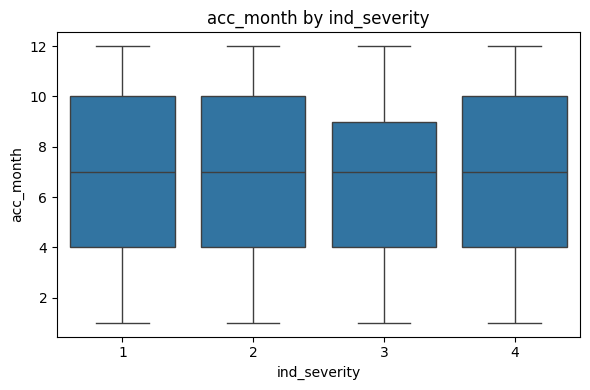

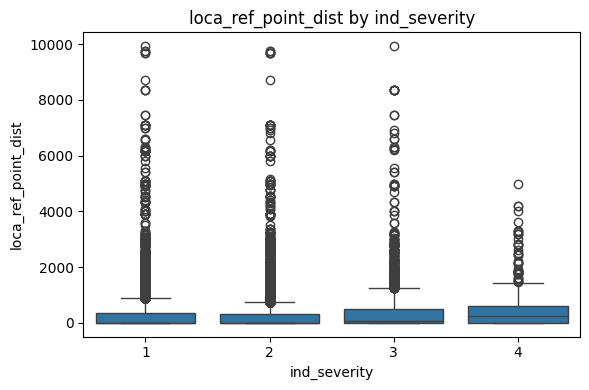

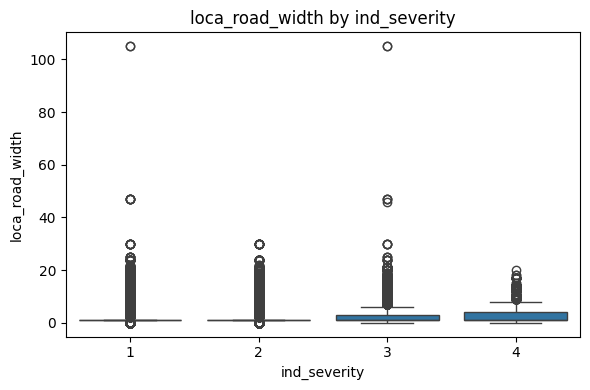

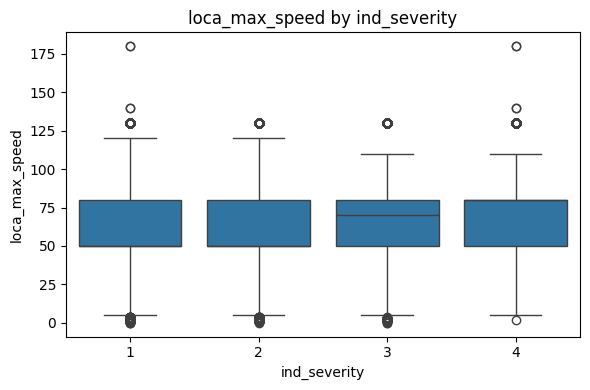

In [102]:
for col in numeric_col_filtered:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='ind_severity', y=col,showfliers=True)
    plt.title(f'{col} by ind_severity')
    plt.tight_layout()
    plt.show()

In [103]:
print(numeric_col_filtered)
print(df['loca_max_speed'].unique())

['acc_month', 'loca_ref_point_dist', 'loca_road_width', 'loca_max_speed']
[ 70.   90.   30.   50.   80.   60.   10.  110.   20.    nan 130.   15.
   5.   40.    3.    4.    1.    0.   45.   25.    2.  100.   65.   12.
 120.   35.    6.   56.    7.   42.   55.    8.   52.  180.   75.   90.1
   9.   50.1  50.2  77.  140.   31.   23.   85.   95.   16.   30.1]


In [104]:
from sklearn.feature_selection import mutual_info_regression
# encode the target variable
y = LabelEncoder().fit_transform(df['ind_severity'].astype(str))

# prepare matrix
numeric_col_filtered = ['acc_month', 'loca_ref_point_dist', 'loca_road_width', 'loca_max_speed']
X = df[numeric_col_filtered].fillna(0)

# which feature is discrete?
discrete_flags = [True, False, False, False]


mi_scores = mutual_info_regression(X, y, discrete_features=discrete_flags)

# results as sorted series
mi_result = pd.Series(mi_scores, index=numeric_col_filtered).sort_values(ascending=False)
print(mi_result)

loca_max_speed         0.021669
loca_ref_point_dist    0.016755
acc_month              0.008360
loca_road_width        0.008331
dtype: float64


# Interpretation of Mutual Information Regression (numeric features vs. ind_severity)
- All MI scores are below 0.03, indicating weak individual predictive power for accident severity.
- Mutual Information (MI) measures how much information a feature provides about the target variable, regardless of linearity.
- loca_max_speed has the highest MI score (~0.023), indicating it is the most informative numeric feature for predicting accident severity, but still very low score. 
- loca_ref_point_dist follows closely (~0.017), suggesting it also contributes information. we marked already to delete. 
- acc_month and loca_road_width have low MI scores (< 0.009), implying limited predictive value.
- MI scores are not normalized. so we can interpret only relative to the complete dataset


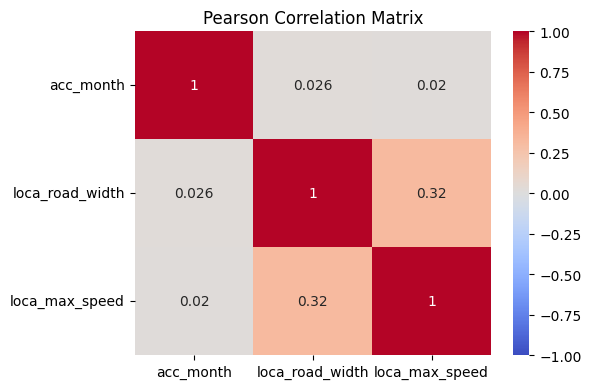

: 

In [ ]:
# pearson
numeric_col_filtered = ['acc_month', 'loca_road_width', 'loca_max_speed']
df_num = df[numeric_col_filtered]
correlation_matrix = df_num.corr(method='pearson')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()